# COS60008 Introduction to Data Science
## Assignment 3, 2024, Semester 1
## Srudent Details:
* Name: Pornkanok Tantewee
* Student ID: 103503476
* Email: 103503476@student.swin.edu.au
* Submission Date: 6 June 2024


## Task3-– Extension

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
#Load the data
df_raw = pd.read_csv('heart.csv')
print('df_raw')
print(df_raw)

df_raw
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium 

In [4]:
 df_raw.info() # it is used for exploration 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df_raw.copy() # it is used for Spliiting data and model performing

perform K-Means clustering to heart failure dataset to see if different groups of patients can be identified based on clinical features.

C:\Users\t_ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


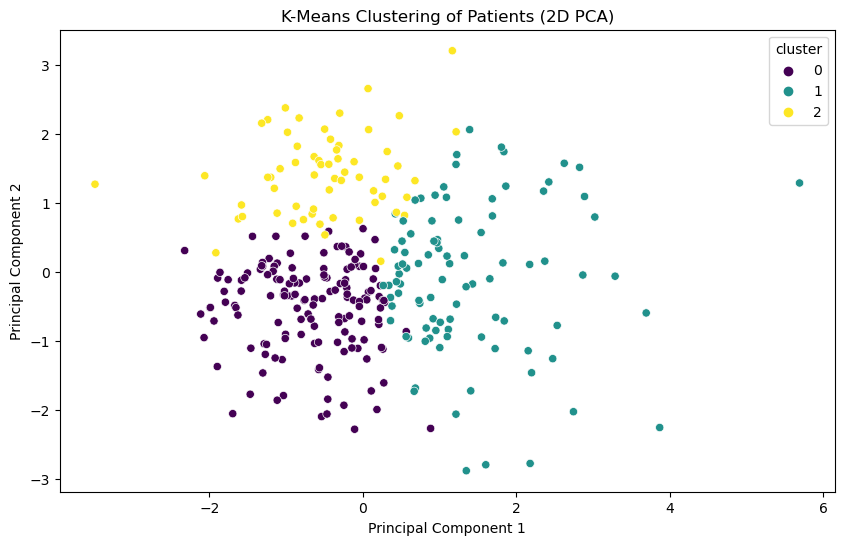

               age   anaemia  creatinine_phosphokinase  diabetes  \
cluster                                                            
0        54.063932  0.431507                697.863014  0.458904   
1        69.623656  0.408602                546.021505  0.365591   
2        63.683333  0.466667                355.033333  0.400000   

         ejection_fraction  high_blood_pressure      platelets  \
cluster                                                          
0                34.452055             0.267123  255826.577397   
1                33.666667             0.408602  237271.207204   
2                53.766667             0.466667  322119.136333   

         serum_creatinine  serum_sodium       sex   smoking        time  \
cluster                                                                   
0                1.095753    137.609589  0.636986  0.321918  164.568493   
1                2.052366    133.774194  0.709677  0.301075   83.397849   
2                1.098667   

In [7]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#scaled the features in similar ranges. This is important because it prevents features with larger ranges from dominating the clustering process.

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['pc1'] = principal_components[:, 0]
df['pc2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Patients (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyze cluster characteristics
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)


#### Summary of code
1.Selects and standardizes features from the DataFrame to ensure each feature contributes equally to the clustering process.

2.Applies K-Means clustering to group the data points into 3 clusters.

3.Performs PCA to reduce the data to 2 dimensions for easier visualization.

4.Visualizes the clusters in a 2D plot using the first two principal components, allowing us to see how the data points are grouped and to analyze the characteristics of each cluster.

After clustering,  The characteristics are analyzed  in each cluster

Cluster Insights
Cluster 0:

Age: Younger average age (54.06 years).
Clinical Features: Higher levels of creatinine phosphokinase and relatively normal ejection fraction (34.45%).
Health Conditions: Moderate prevalence of anaemia and diabetes.
Mortality: Lowest death event rate (16.4%).
Follow-up Time: Highest follow-up period (164.57 days).
Principal Components: Negative PC1 and PC2 values.

Cluster 1:
Age: Older average age (69.62 years).
Clinical Features: Higher serum creatinine levels (2.05 mg/dL) and lower serum sodium levels (133.77 mEq/L).
Health Conditions: Higher prevalence of high blood pressure.
Mortality: Highest death event rate (65.6%).
Follow-up Time: Shortest follow-up period (83.40 days).
Principal Components: High positive PC1 and negative PC2 values.

Cluster 2:
Age: Intermediate average age (63.68 years).
Clinical Features: Highest ejection fraction (53.77%) and platelet count (322119.14 kiloplatelets/mL).
Health Conditions: Higher prevalence of high blood pressure and anaemia.
Mortality: Moderate death event rate (18.3%).
Follow-up Time: Moderate follow-up period (119.42 days).
Principal Components: Negative PC1 and high positive PC2 values.

Summary of Findings
Age and Mortality
Cluster 1, which has the oldest average age and the highest serum creatinine levels, exhibited the highest rate of death events. This suggests that age and kidney function may play significant roles in influencing mortality.

Ejection Fraction
Cluster 2, characterized by the highest ejection fraction, demonstrated a lower death event rate. This implies that better heart function is associated with higher survival rates.

Serum Sodium
Cluster 1's lower serum sodium levels were linked to higher mortality rates, indicating that electrolyte imbalances might be more prevalent among critical patients.

Clustering helps to find hidden patterns in the data. In this case, it revealed distinct groups of heart
failure patients with different characteristics and mortality rates. This information can be valuable for improving patient care and outcomes.